In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from tonic.utils import plot_events
import numpy as np

# Tonic
## 1. Loading events

In [21]:
%cd '../HOTS'
import tonic

transform = tonic.transforms.SpatialJitter(variance_x = 10, variance_y = 10)

testset = tonic.datasets.NCARS(save_to='../Data',
                                download=False,
                                #transform=tonic.transforms.Compose([tonic.transforms.ToSparseTensor()])
                               )#transform=tonic.transforms.Compose([tonic.transforms.ToSparseTensor]))

#testloader = tonic.datasets.DataLoader(testset, shuffle=True)

/home/antoine/homhots/HOTS/HOTS


In [22]:
testloader = tonic.datasets.DataLoader(testset, batch_size=1, shuffle=True)

In [40]:
events, target = next(iter(testloader))

print(events.squeeze().numpy().shape)
print(max(events[0,:,testset.ordering.find("x")].numpy()))
print(max(events[0,:,testset.ordering.find("y")].numpy()))
print(max(events[0,:,testset.ordering.find("t")].numpy()))
print(max(events[0,:,testset.ordering.find("p")].numpy()))


(1339, 4)
98.0
99.0
99917.0
1.0


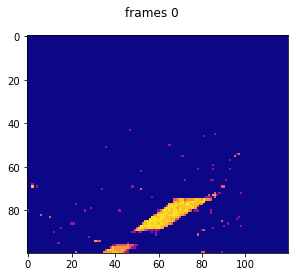

In [41]:
#for t in range(1,events.shape[0]):
t = 500000
plot_events(events.squeeze().numpy(), frame_time=t, sensor_size=testset.sensor_size, ordering=testset.ordering)

In [124]:
events, target = next(iter(testloader))
print("{} event stream for target {}".format(events.shape, target.item()))

torch.Size([1, 5312, 4]) event stream for target 0


In [125]:
events, target = next(iter(testloader))
print(min(events[0,:,testset.ordering.find("x")]).item())
print(max(events[0,:,testset.ordering.find("x")]).item())

0
33


In [126]:
t_train = []
t_train.append(events[0,:,0])
print(t_train[0])

tensor([18, 13,  9,  ...,  5, 27,  3], dtype=torch.int32)


## 2. Using them as input of our network

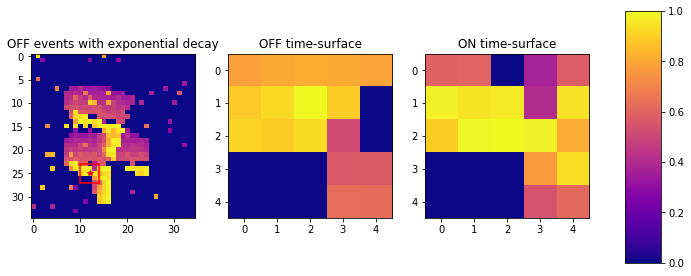

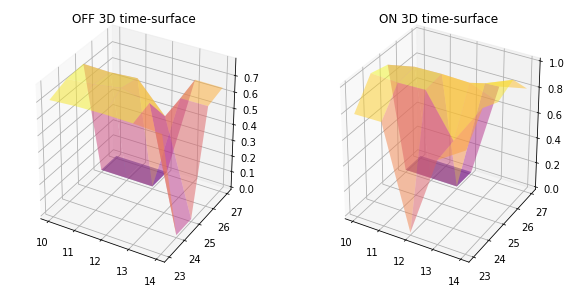

In [128]:
from TimeSurface import TimeSurface

target_event = 2000
SpTe = TimeSurface(R=2,tau=200000,camsize=[34,34])
i = 0
while i<target_event:
    
    TS, activ = SpTe.addevent(events[0][i][0],events[0][i][1],events[0][i][2], int(events[0][i][3]))
    i+=1

SpTe.plote()

SpTe.plot3D()

## 3. Transforms
### 3.1. Denoise

Cycles through all events and drops it if there is no other event within a time of time_filter and a spatial neighbourhood of 1.

In [10]:
import tonic.transforms as transforms
transform = transforms.Compose([transforms.Denoise(time_filter=1000)])

testset = tonic.datasets.NMNIST(save_to='../Data',
                                train=False,
                                transform=transform)

testloader = tonic.datasets.DataLoader(testset, shuffle=False)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data


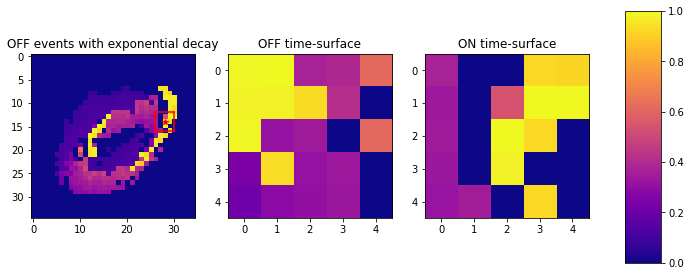

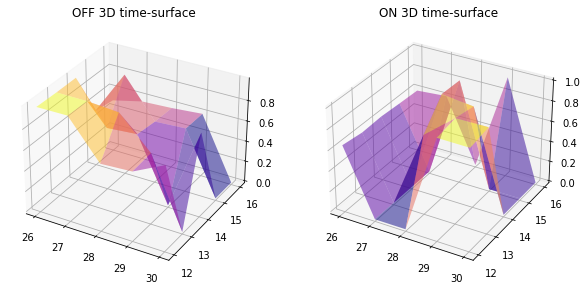

In [11]:
from TimeSurface import TimeSurface
events, target = next(iter(testloader))
print("{} event stream for target {}".format(events.shape, target))

target_event = 2000
SpTe = TimeSurface(R=2,tau=200000,camsize=[34,34])
i = 0
while i<target_event:
    TS, activ = SpTe.addevent(events[0][i][0],events[0][i][1],events[0][i][2], int(events[0][i][3]))
    i+=1
    
SpTe.plote()

SpTe.plot3D()

### 3.2 Make Time Surfaces

In [12]:
transform = transforms.Compose([transforms.Denoise(time_filter=10000),
                                transforms.ToTimesurface(surface_dimensions=(5,5), tau=5e3),])

testset = tonic.datasets.NMNIST(save_to='../Data',
                                train=False,
                                transform=transform)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data


In [13]:
testloader = tonic.datasets.DataLoader(testset, shuffle=False)
events, target = next(iter(testloader))
print(events.shape, target)

torch.Size([1, 5410, 2, 5, 5]) tensor([0])


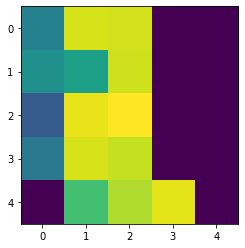

In [14]:
plt.imshow(events[0][1000][1][:][:])

### 3.3 Other transforms

#### On events:
- Crop
- DropEvents
- FlipLR
- FlipPolarity
- SpatialJitter
- TimeJitter
- UniformNoise

#### Event representations:
- ToAveragedTimesurface
- ToSparseTensor
- ToRateCodedFrame

#### Target tranforms:
- ToOneHotEncoding
- Repeat


## 2. Loading Batch

In [15]:
testset = tonic.datasets.NMNIST(save_to='../Data', train=False)

testloader = tonic.datasets.DataLoader(testset,
                                       #batch_size=15,
                                       #collate_fn=tonic.utils.pad_events,
                                       shuffle=True)

events, target = next(iter(testloader))
print(events.shape, target)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data
torch.Size([1, 4828, 4]) tensor([8])


In [16]:
events, target = next(iter(testloader))
print(events.shape, target)

torch.Size([1, 4704, 4]) tensor([8])


## Datasets used:

- DVS GESTURE: https://research.ibm.com/dvsgesture/
- N-CALTECH 101: https://www.garrickorchard.com/datasets/n-caltech101
- N-CARS: https://www.prophesee.ai/dataset-n-cars-download/
- N-MNIST: https://www.garrickorchard.com/datasets/n-mnist
- POKER DVS: http://www2.imse-cnm.csic.es/caviar/POKERDVS.html